### Sidali Benabdi
### DAB July 2025
### Week 12 Workshop Creating Custom Visualizations with Seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# =============================================================================
# Part 1: Executive Dashboard Creation
# =============================================================================

print("📊 Loading workshop data...")
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')

print(f"✅ Data loaded successfully:")
print(f"   - {len(customers)} customers")
print(f"   - {len(products)} products") 
print(f"   - {len(sales)} sales transactions")

📊 Loading workshop data...
✅ Data loaded successfully:
   - 100 customers
   - 60 products
   - 150 sales transactions


In [2]:
customers.info()
products.info()
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        100 non-null    int64 
 1   first_name         100 non-null    object
 2   last_name          100 non-null    object
 3   age                100 non-null    int64 
 4   state              100 non-null    object
 5   income             100 non-null    int64 
 6   registration_date  100 non-null    object
 7   email              100 non-null    object
dtypes: int64(3), object(5)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    60 non-null     int64  
 1   product_name  60 non-null     object 
 2   category      60 non-null     object 
 3   price         60 non-null     float64
 4   launch_date 

In [3]:
# After runing the .info method we notice that the dates collumn are being treated as an object so we have to fix that
# We also have to extract the separate month day and year to give us more room when analyzing the data 

# Convert string dates to datetime objects so we can extract day names, months, etc.
customers['registration_date'] = pd.to_datetime(customers['registration_date'])
products['launch_date'] = pd.to_datetime(products['launch_date'])
sales['transaction_date'] = pd.to_datetime(sales['transaction_date'])

# We want to analyze patterns by day of the week, so extract day names
sales['year'] = sales['transaction_date'].dt.year
sales['month'] = sales['transaction_date'].dt.month
sales['day_of_week'] = sales['transaction_date'].dt.dayofweek
sales['day_name'] = sales['transaction_date'].dt.day_name()

In [4]:
### we double check that the dates collumns have been properly converted to true date format
customers.info()
products.info()
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        100 non-null    int64         
 1   first_name         100 non-null    object        
 2   last_name          100 non-null    object        
 3   age                100 non-null    int64         
 4   state              100 non-null    object        
 5   income             100 non-null    int64         
 6   registration_date  100 non-null    datetime64[ns]
 7   email              100 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   product_id    60 non-null     int64         
 1   product_name  60 non-

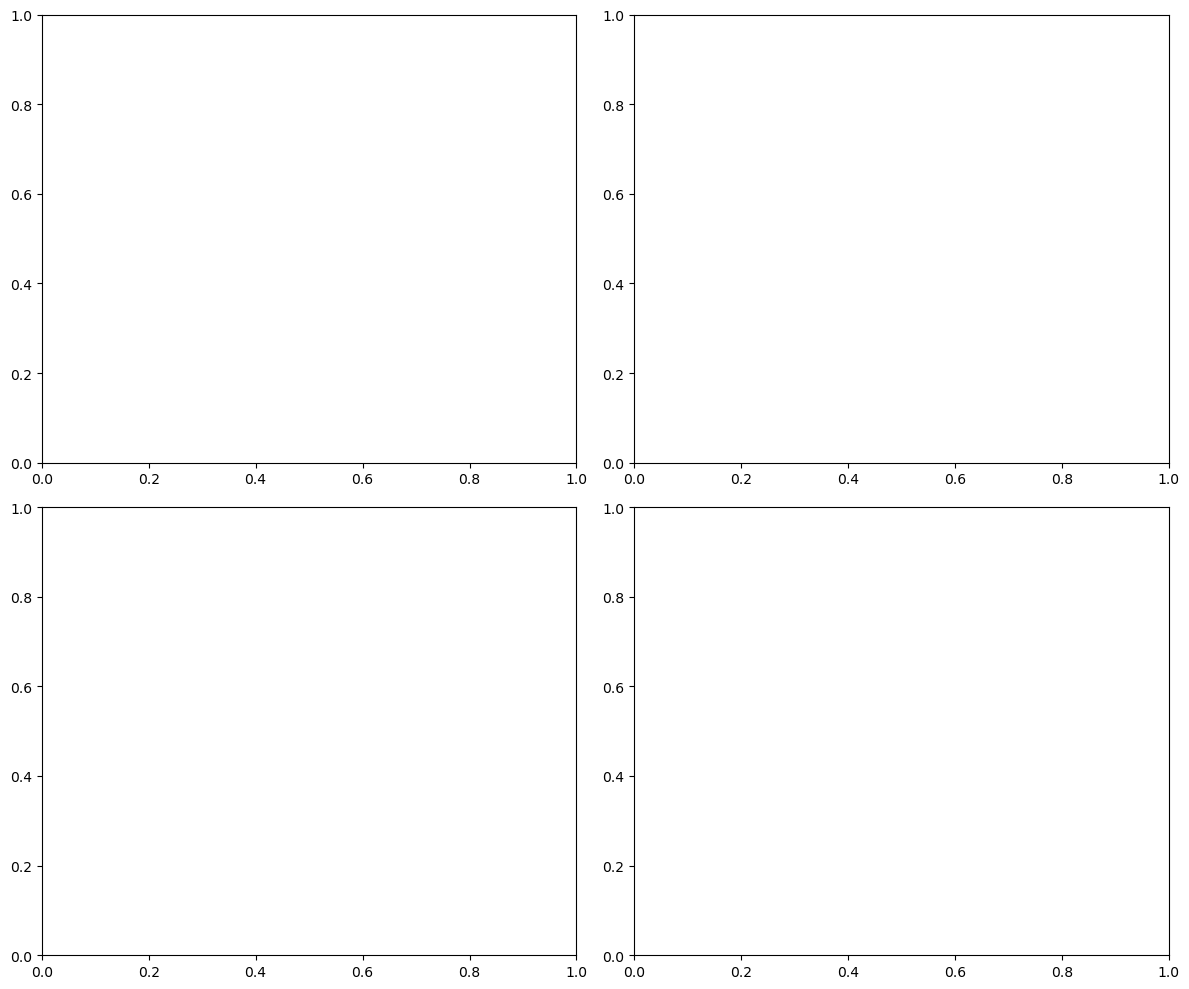

In [5]:
### preparing the dahboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [6]:
# Chart 1 Data: Revenue by product category
# We need to combine sales data with product category information
# Use merge() to join sales with products, then group by category and sum revenue
sales_with_category = sales.merge(products[['product_id', 'category']], on='product_id')
category_revenue = (
    sales_with_category.groupby('category', as_index=False)['total_amount']
    .sum()
    .sort_values('total_amount', ascending=False)
)
sns.barplot(
    data = category_revenue,
    x='total_amount',   # numeric variable (horizontal axis)
    y='category',      # categorical variable (vertical axis)
    order=category_revenue['category'],
    ax=ax1,
    hue = 'category',
    palette='colorblind'
)

ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))
ax1.set_title('Revenue by Product Category')
ax1.set_xlabel('Revenue')
ax1.set_ylabel('Category')

Text(4.444444444444445, 0.5, 'Category')

In [7]:
# Chart 2 Data: Customer count by state  
top6_states = (                     # assign a variable directly with the top 6 values  for customer state by value count
    customers['state']
    .value_counts()
    .head(6)
    .reset_index(name='customer_count')
    .rename(columns={'index': 'state'})
)

sns.barplot(
    data=top6_states,
    x='state',
    y='customer_count',
    order=top6_states.sort_values('customer_count', ascending=False)['state'],
    ax=ax2,
    hue='state',
    palette='colorblind'
)

ax2.set_title('Top 6 States by Customer Count')
ax2.set_xlabel('Number of Customers')
ax2.set_ylabel('State')

Text(596.9444444444443, 0.5, 'State')

In [8]:
# Chart 3 Data: Daily transaction patterns
# Calculate average transaction amount for each day of the week
# Define the order of days so our chart shows Monday through Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg_amount = (
    sales.groupby('day_name')['total_amount']
    .mean()
    .reindex(day_order)
    .reset_index(name='Avg_Transaction_Amount')
    .rename(columns={'day_name': 'Day_Of_The_Week'})
)

sns.lineplot(
    data=daily_avg_amount,
    x='Day_Of_The_Week',
    y='Avg_Transaction_Amount',
    ax=ax3,
    marker = 'o'
)

ax3.set_title('Daily transaction patterns')
ax3.set_xlabel('Day_Of_The_Week')
ax3.set_ylabel('Avg_Transaction_Amount')


Text(4.444444444444445, 0.5, 'Avg_Transaction_Amount')

In [9]:
# Chart 4 Data: Transaction amounts for distribution analysis
# We'll use this to create a histogram showing the spread of transaction values
# transaction_amounts = sales[['total_amount']]
# sns.histplot(data=transaction_amounts, x='total_amount', bins = 30, ax=ax3)
sns.histplot(data=sales, x='total_amount', bins=15, color='steelblue',ax=ax4)
mean_value = sales['total_amount'].mean()
ax4.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean = ${mean_value:,.2f}')
ax4.legend()
ax4.set_title('Transaction Amount Frequency')
ax4.set_xlabel('Transaction Amount')
ax4.set_ylabel('Frequency')

Text(596.9444444444443, 0.5, 'Frequency')

In [10]:
### setting up prefesional styling 

fig.subplots_adjust(
    wspace=0.2,   # horizontal space between plots
    hspace=0.3    # vertical space between plots
)
ax1.tick_params(axis='x', rotation=30, labelsize=10, pad=6)
ax3.tick_params(axis='x', rotation=30, labelsize=10, pad=6)

sns.set_theme(
    style="whitegrid",      # Clean white background with subtle grid lines
    context="talk"          # Larger fonts and elements for presentations
)

# Fine-tune some matplotlib settings for extra polish
# These settings make the charts look more professional
plt.rcParams.update({
    'figure.facecolor': 'white',        # White background for the entire figure
    'axes.facecolor': 'white',          # White background for each chart
    'font.family': 'DejaVu Sans',       # Professional, readable font
    'axes.spines.top': False,           # Remove top border (cleaner look)
    'axes.spines.right': False,         # Remove right border (cleaner look)
})
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>


CHALLENGE: EXECUTIVE SUMMARY DASHBOARD
📊 Creating Executive Dashboard with actual workshop data...

📈 Workshop Data Overview:
   • Total Revenue: $13,409.03
   • Average Transaction: $89.39
   • Product Categories: 5
   • States Represented: 5


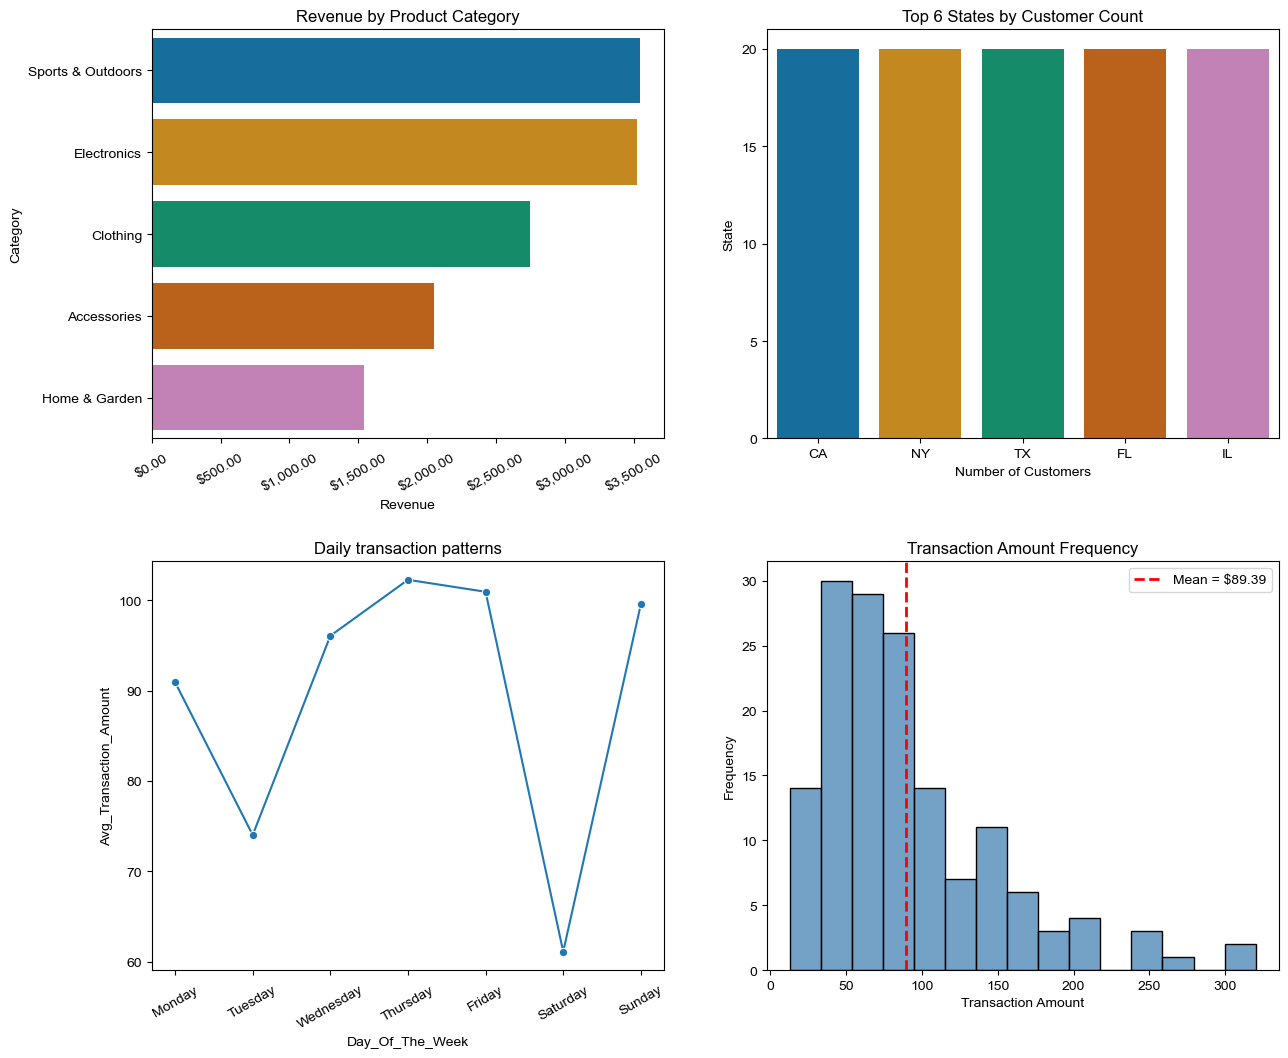

In [11]:
print("\n" + "=" * 60)
print("CHALLENGE: EXECUTIVE SUMMARY DASHBOARD")
print("=" * 60)

print("📊 Creating Executive Dashboard with actual workshop data...")

# Display key statistics first (always good to understand your data!)
print(f"\n📈 Workshop Data Overview:")
print(f"   • Total Revenue: ${sales['total_amount'].sum():,.2f}")
print(f"   • Average Transaction: ${sales['total_amount'].mean():.2f}")
print(f"   • Product Categories: {products['category'].nunique()}")
print(f"   • States Represented: {customers['state'].nunique()}")
fig

In [12]:
# BONUS: Advanced Layered Visualization
# Data Preparation Challenge:
# 1.Merge customer data with sales data to create customer spending summaries
sales_with_customer_info = sales.merge(customers, on='customer_id')

In [13]:
# 2.Calculate total spending and purchase counts for each customer:
# total spending per customer
total_spending_per_customer= (   #creating a separate dt with the total each cutomer spent
    sales_with_customer_info.groupby('customer_id')['total_amount']
    .sum()
    .reset_index(name='total_spent')
)

total_spending_per_customer.info()  #key insight we 90 rows meaning we have 10 customers who did not buy anything
                                    # we can create a table of those ids and follow up with them

purchase_count_per_customer=(    #creating a separate dt with how many purchases each customer made
    sales_with_customer_info.groupby('customer_id')['sale_id']
    .count()
    .reset_index(name='purchase_count')
)

purchase_count_per_customer.info()  

# we merge both tables of spending and purchase count to the original customers table to form one unified table
# with all the customer info and that includes the customers that have not made any purchases that will make it easier to form their separate table
customer_spending_summaries = total_spending_per_customer.merge(purchase_count_per_customer,on='customer_id')
customer_analysis = customers.merge(customer_spending_summaries, on='customer_id', how='left')

# creating a databse of customers who have not made any purchases yet
# this can be used to follow up with them , maybe sending coupons or disccount codes with incentivise them 

non_spending_customers = customer_analysis[customer_analysis['total_spent'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  90 non-null     int64  
 1   total_spent  90 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     90 non-null     int64
 1   purchase_count  90 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB


In [14]:
# 3.Create age group categories (Under 30, 30-45, 46-60, Over 60) using pandas
customer_analysis['age_group'] = pd.cut(customer_analysis['age'],
                                        bins=[0, 30, 45, 60, 100],
                                        labels=['Under 30', '30-45', '46-60', 'Over 60'])

In [15]:
# 4. Handle customers who haven't made purchases by filling NaN values with 0
customer_analysis[['total_spent', 'purchase_count']] = customer_analysis[['total_spent', 'purchase_count']].fillna(0)

In [16]:
# double checking our final customer_analysis dataframe is ready for visulization
customer_analysis

,customer_id,first_name,last_name,age,state,income,registration_date,email,total_spent,purchase_count,age_group
0,1,John,Smith,34,CA,75000,2022-01-15,john.smith@email.com,229.98,2.0,30-45
1,2,Sarah,Johnson,28,NY,82000,2022-01-22,sarah.johnson@email.com,179.96,2.0,Under 30
2,3,Michael,Brown,45,TX,95000,2022-02-03,michael.brown@email.com,154.98,2.0,30-45
3,4,Emily,Davis,31,FL,68000,2022-02-14,emily.davis@email.com,234.95,2.0,30-45
4,5,David,Wilson,52,IL,110000,2022-02-28,david.wilson@email.com,149.98,2.0,46-60
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Alice,Wallace,28,CA,69000,2023-12-08,alice.wallace@email.com,0.00,0.0,Under 30
96,97,Henry,Woods,47,NY,98000,2023-12-15,henry.woods@email.com,0.00,0.0,46-60
97,98,Barbara,Cole,34,TX,79000,2023-12-22,barbara.cole@email.com,0.00,0.0,30-45
98,99,Walter,West,40,FL,87000,2023-12-29,walter.west@email.com,0.00,0.0,30-45


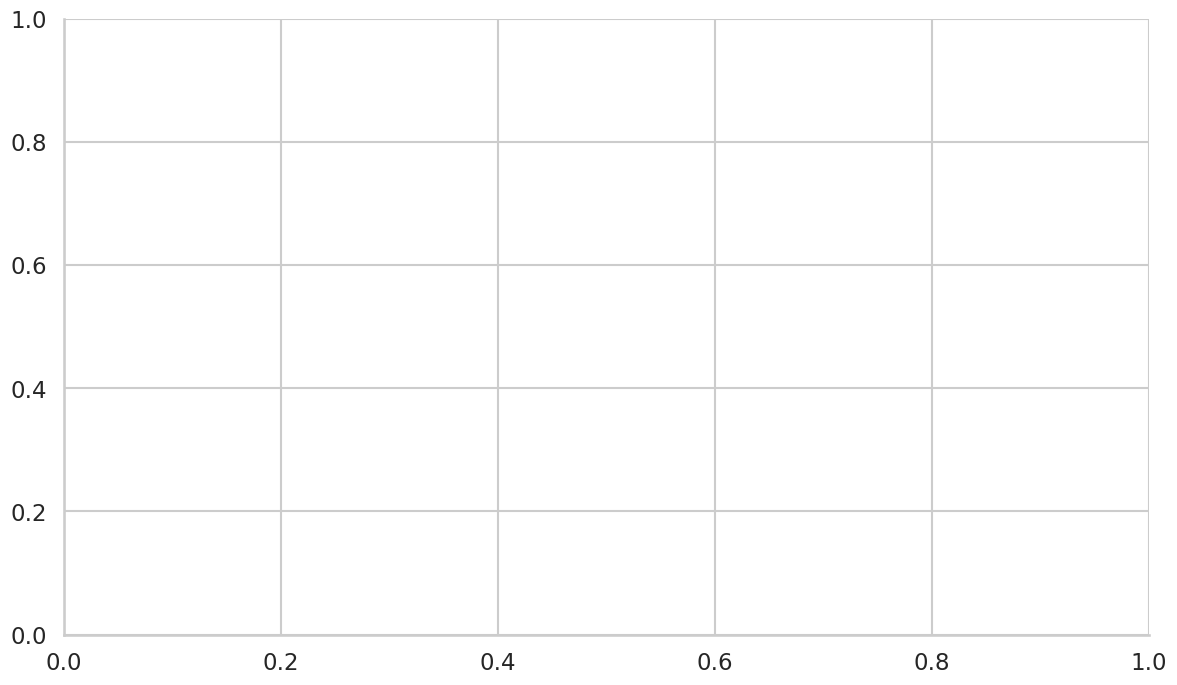

In [17]:
# first we create a large fig to accomodate our chart
fig, ax = plt.subplots(figsize=(14, 8))

In [18]:
# 1. Layer 1: Foundation Scatter Plot
sns.scatterplot(
    data=customer_analysis,
    x='income',
    y='total_spent',
    hue='age_group',
    alpha=0.7,
    s=80,
    ax=ax,
    palette='plasma'
)

<Axes: xlabel='income', ylabel='total_spent'>

In [19]:
# 2. Layer 2: Statistical Trend Analysis
sns.regplot( 
    data=customer_analysis,
    x='income',
    y='total_spent',
    scatter=False,
    color='darkred',
    line_kws={'linewidth': 3},
    ax=ax,
    label='Income Spending Relationship'
)

<Axes: xlabel='income', ylabel='total_spent'>

In [20]:
# 3. Layer 3: Business Context References

#first we define what the target spending is 
target_spending = customer_analysis['total_spent'].mean()  
#then we add the h line
ax.axhline(target_spending, color='red', linestyle='--', linewidth=2, alpha=0.8, label=f'Target Spending: ${target_spending:.0f}')

high_income_threshold = customer_analysis['income'].quantile(0.75)

ax.axvline(high_income_threshold, color='blue', linestyle='--', linewidth=2, alpha=0.8, label=f'High Income: ${high_income_threshold:,.0f}')


In [21]:
# 4. Layer 4: Statistical Annotations

# Calculate correlation between income and spending
correlation = customer_analysis['income'].corr(customer_analysis['total_spent'])

# Calculate key business metrics
high_income_customers = len(customer_analysis[customer_analysis['income'] > high_income_threshold])
high_spenders = len(customer_analysis[customer_analysis['total_spent'] > target_spending])

# Add correlation annotation in top-left
ax.text(0.05, 0.95, f'Income-Spending Correlation: {correlation:.3f}',
        transform=ax.transAxes, fontsize=12, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.5",
        facecolor='lightblue', alpha=0.8)
)

# Add business insights annotation in top-right
insight_text = f'High Income Customers: {high_income_customers}\nHigh Spenders: {high_spenders}\nConversion Rate: {(high_spenders/high_income_customers)*100:.1f}%'

ax.text(
    0.95, 0.95, insight_text,
    transform=ax.transAxes,
    fontsize=11,
    bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat', alpha=0.8),
    verticalalignment='top', horizontalalignment='right'
)

Text(0.95, 0.95, 'High Income Customers: 25\nHigh Spenders: 51\nConversion Rate: 204.0%')

In [22]:
# 5. Layer 5: Age Group Performance Callouts

# Calculate average spending by age group
age_group_avg = customer_analysis.groupby('age_group')['total_spent'].mean()
top_age_group = age_group_avg.idxmax()
top_avg_spending = age_group_avg.max()

# Add callout for top-performing age group and include relevant buisness context
top_customer = customer_analysis[customer_analysis['age_group'] == top_age_group].nlargest(1, 'total_spent')
if not top_customer.empty:
     ax.annotate(f'Top Age Group:\n{top_age_group}\nAvg: ${top_avg_spending:.0f}',
                xy=(top_customer['income'].iloc[0], top_customer['total_spent'].iloc[0]),
                xytext=(-20, 20), textcoords='offset points',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1', color='black'), ha = 'right')

C:\Users\bsida\AppData\Local\Temp\ipykernel_8968\658643517.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = customer_analysis.groupby('age_group')['total_spent'].mean()


In [23]:
# ploshing up the fig : 

ax.set_title('Customer Income vs Spending Analysis\nLayered Business Intelligence Dashboard', 
                   fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Annual Income ($)', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Amount Spent ($)', fontsize=12, fontweight='bold')

ax.legend(
    loc='upper left',
    bbox_to_anchor=(1.05, 1)
)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

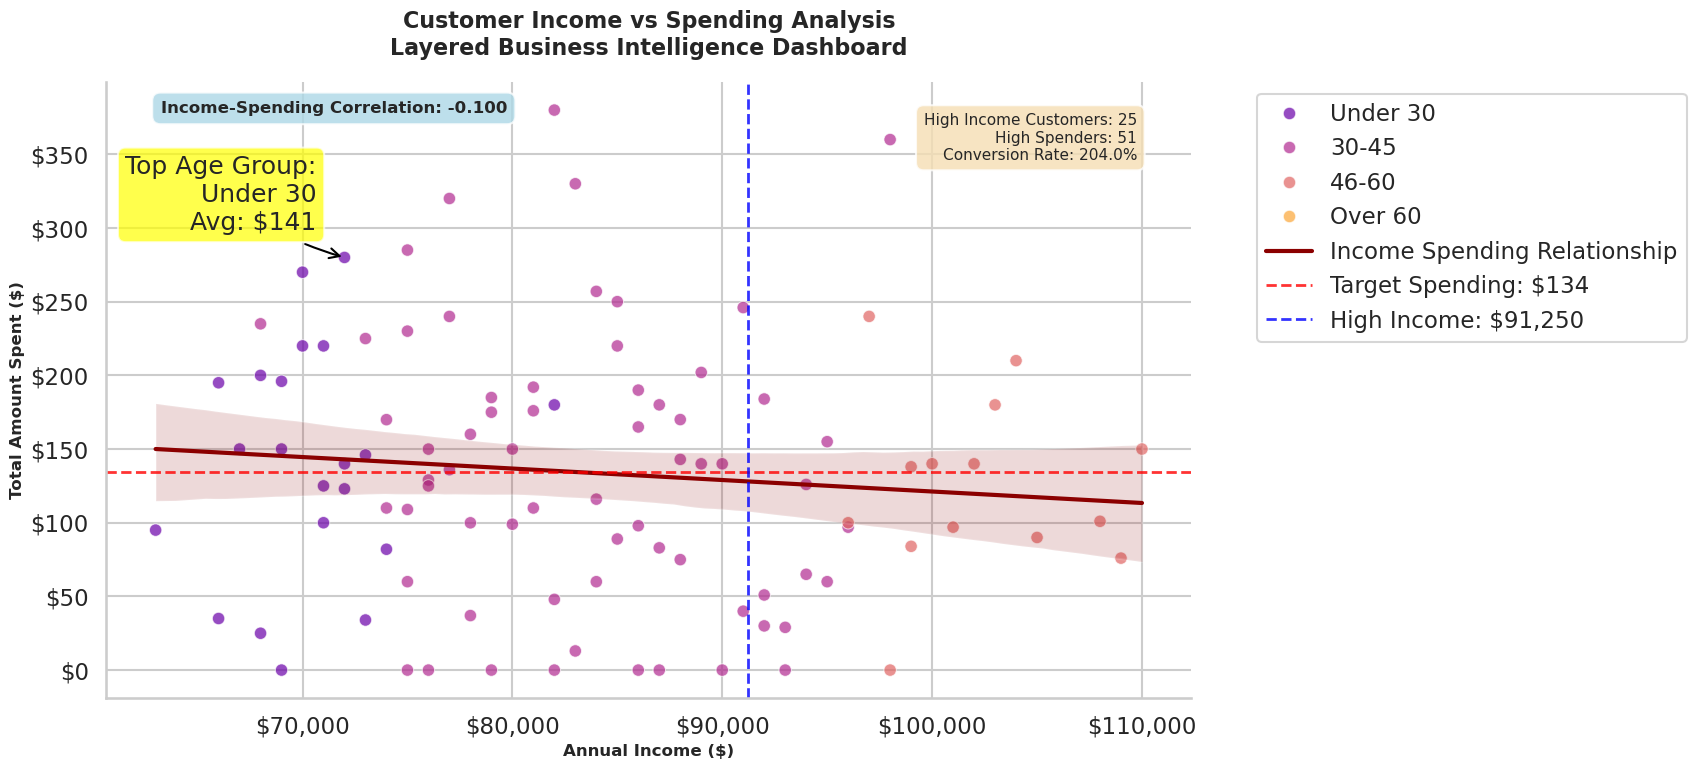

In [24]:
fig